In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io

## СОФИКС ПРОГНОЗА
### Прогноза за състава на индеска базирана на Правилата на Българска фондова борса за изчисляване на  СОФИКС. 

## Цел на проекта

Целта на този проект е да се изготви софтуерен продукт, който да прогнозира в максимално възможна степен бъдещият състав на индекса. За изчисляване на прогнозите са използвани всички налични официално достъпни и максимално представителни източници на информация - данни от Българска фондова борса , Централен депозитар, икономически сайтове предоставящи на публиката борсова информация в реално време и т.н.

## Описание, понятия, определения, методология на подбор на участниците в СОФИКС

СОФИКС (SOFIX) е български борсов индекс на „Българска фондова борса - София“ (БФБ).

Така нареченият Индекс на сините чипове започва да се изчислява на 20 октомври 2000 г и от тогава е неотменен индикатор на българският фондов пазар. В годините се е наложил, като най-представителният индекс на БФБ. Базиран е на пазарната капитализация на включените в него емисии обикновени акции, коригирана с фрий-флоут коефициента на всяка от тях. Състои се от петнадесет емисии акции, отговарящи на определени условия, описани в Правилата на БФБ. Техният подбор се осъществява на всеки шест месеца по определени критерии.

Като най-представителен индекс за българският фондов пазар, инвестирането в книжа присъстващи в СОФИКС е обект на интерес от страна на повечето инвеститори - физически и юридически лица, институционални и портфейлни инвеститори. Особен интерес към състава и поведението на индекса имат т. нар. индексни фондове, чийто инвестиционни стратегии следват представянето на индекса, като се придържа към метода на пълно или частично физическо репликиране на този индекса (или с други думи -  инвестират  основно  в  акции  на  компаниите участници в следваният индекс). Конструирани по този начин, портфейлите на индексните фондове обичайно постигат доходност близка до тази на индекса.

За тези представители на капиталовия пазар е от огромно значение да разполагат с прогнозен инструментариум за състава на СОФИКС значително преди БФБ да обяви своята официална класация. Обичайно даден индекснен фонд, следващ СОФИКС е принуден при ранкирането на индекса на всеки шест месеца да прави операции по балансиране на портфейла си, като продава или купува големи пакети книжа. Това често се сблъсква с ниската ликвидност на пазара и води до определени загуби. Затова придържането към една прецизно изготвена прогноза за бъдещият състав на индекса помага операциите по балансиране на портфейла да се осъществят в един доста по-продължителен и рационален период. 

Интерес да попаднат в класацията на СОФИКС имат и самите компании. Традиционно, участниците в индекса са приемани от инвеститорите, като едни от най-сигурните, доходни и ликвидни акции на пазара. 

### Общи изисквания при избор на емисии в СОФИКС

В СОФИКС участват:

- Емисии, които са допуснати до търговия на регулиран пазар.

- Емисии на дружества, които не са обявени в ликвидация или несъстоятелност и не изпълняват оздравителна програма
Емисии, които не са временно спрени от търговия.

- Емисии, за които не е налице правна несигурност, поради която размерът на емисията не може да бъде точно и безспорно определен.


### Допълнителни изисквания при избор на емисии в СОФИКС

Всяка емисия трябва да покрива следните допълнителни условия:
	
- Да е допусната до търговия на основния пазар на Борсата (Bulgarian Stock Exchange или BSE);
- Да се е търгувала на пазар, организиран от Борсата, не по-малко от 3 (три) месеца преди включването й в индекса. 
- Да има пазарна стойност на фрий-флоута не по-малка от 10 000 000 (десет милиона) лева;
- Броят акционери, притежатели на емисията, да не е по-малък от 750 (седемстотин и петдесет);
- Да има наличен спред между цените „купува“ и „продава“, определен по методология върху осъществените наблюдения през предходния шестмесечен период.

### Крайна селекция на емисии в СОФИКС

Ранкирането на индекса се осъществява по следните критерии, които се прилагат с еднаква тежест:	
- Най-голяма пазарна стойност на фрий-флоута;
- Най-голям брой сделки за последния шестмесечен период;
- Най-голяма медианна стойност на седмичния оборот за последния шестмесечен период;
- Най-малка средно-аритметична стойност на спреда между цените „купува“ и „продава“, изчислена по методология.

Окончателното класиране се извършва във възходящ ред по следната формула:

$$Позиция = K_{1}+K_{2}+K_{3}+K_{4}$$

###### Където:
$K_{1}$ е позицията в класирането на съответната емисия по медианна стойност на седмичния
оборот;\
$K_{2}$ е позицията в класирането на съответната емисия по брой сделки;\
$K_{3}$ е позицията в класирането на съответната емисия по средно-аритметична стойност на
спреда;\
$K_{4}$ е позицията в класирането на съответната емисия по пазарна стойност на фрий-флоута.

За целите на методологията на СОФИКС се въвеждат следните дефиниции на описаните по-горе показатели:

##### Пазарна стойност на фрий-флоута

1. „Фрий-флоут” е броят акции по данни на депозитарна институция, притежание на акционери, притежаващи не повече от 5 (пет) на сто от гласовете в общото събрание на емитента.

2. „Фрий-флоут коефициент” е медианната стойност на отношението между броя акции по т.1 и броят акции в емисията по данни на депозитарна институция, закръглен до четвъртия знак след десетичната запетая, за всяка от търговските сесии през 1 (един) от следните тримесечни периоди: 2 март – 1 юни, 2 юни – 1 септември; 2 септември – 1 декември, 2 декември – 1 март.

3. „Пазарна капитализация” е произведението от броя акции в съответната емисия по единичната цена, по която е сключена последната сделка на регулиран пазар.

4. „Пазарна стойност на фрий-флоута” е произведението стойностите по т. 2 и т. 3.

##### Спред
Спредът между цените „купува“ и „продава“ за всяка една емисия се изчислява като:

1. Активните в системата за търговия поръчки се тестват ежедневно за едновременното изпълнение на входящи поръчки „продава“ и „купува“ с обща стойност от 20 000 лева, от 15 000 лева и от 10 000 лева в четири произволно избрани момента по време на търговска сесия, по един в интервалите 10:00:00 – 11:30:00, 11:30:01 – 13:00:00, 13:00:01 - 15:30:00, 15:30:01 – 16:55:00.

2. Във всеки от моментите и за всеки един от четирите общи размера на входящите поръчки се калкулира достигнатият спред след потенциалното изпълнение на поръчките „купува“ и „продава“, изчислен в резултат на прилагането на следната формула:

$$Спред = \frac{А - В} {А} *100 (\%)$$

където “А” е цената на най-добрата поръчка “продава” след потенциалното изпълнение на входяща поръчка „купува“, съответно “В” е цената на най-добрата поръчка “купува” след потенциалното изпълнение на входяща поръчка „продава“, за всяка една от четирите общи стойности.

3. Класирането на емисиите по този критерий се извършва във възходящ ред за всеки един размер на потенциално изпълнимите поръчки „купува“ и „продава“ за последния шестмесечен период.

4. Емисиите, които нямат определена стойност в 68,27 % от наблюденията при тест за изпълнение на поръчки в размер на 20 000 лева, но разполагат с такава при тест в размер на 15 000 лева, участват в класирането след последната емисия, разполагаща със спред при 20 000 лева.

5. Емисиите, които нямат определена стойност в 68,27 % от наблюденията при тест за изпълнение на поръчки в размер на 15 000 лева, но разполагат с такава при тест в размер на 10 000 лева, участват в класирането след последната емисия, разполагаща със спред при 15 000 (петнадесет хиляди) лева.

##  Софтуерна документация на приложението

Приложението е разработено с Python 3.8. Допълнителните библиотеки, посредством които се извлича и обработва информацията от различни източници са Pandas и Tabula. Необходимите за обработка данни се съхраняват в PostgreSQL база данни.
Цялостното съдържание на проекта и кода може да бъде разгледано на https://github.com/olgayordanova/Artificial-Intelligence/tree/main/DataScience/sofix_project

#####  Приложението съдържа:
- Модул за инициализиране на системата.
- Модул за извличане, обработка и записване на информацията необходима за изчисляването на четирите основни показателя - фрий-флоут, брой сделки, седмичния оборот и спреда между цените „купува“ и „продава“.
- Модул за обработка на резултата и генериране на текуща класация.
 

### База данни

Използвана е ORDBMS PostgreSQL.


Таблица emission съдържа инициализиращата информация за емисиите. Данните за всеки от останалите 4 показатели се съхранява както следва:

- free_float съхранява дневни данни за фрий-флоута по емисиите;
- count_deals съхранява дневни данни за броя сделки по отделните емисии;
- spread съхранява дневни данни изчисленият спред между цените „купува“ и „продава“;
- prices_count_shares съхранява дневни данни за цените и обемите на изтъргуваните акции.

Архитектурата на базата данни е представена в следната диаграма:

In [4]:
def read_image(path):
    img = skimage.io.imread(path)
    return img

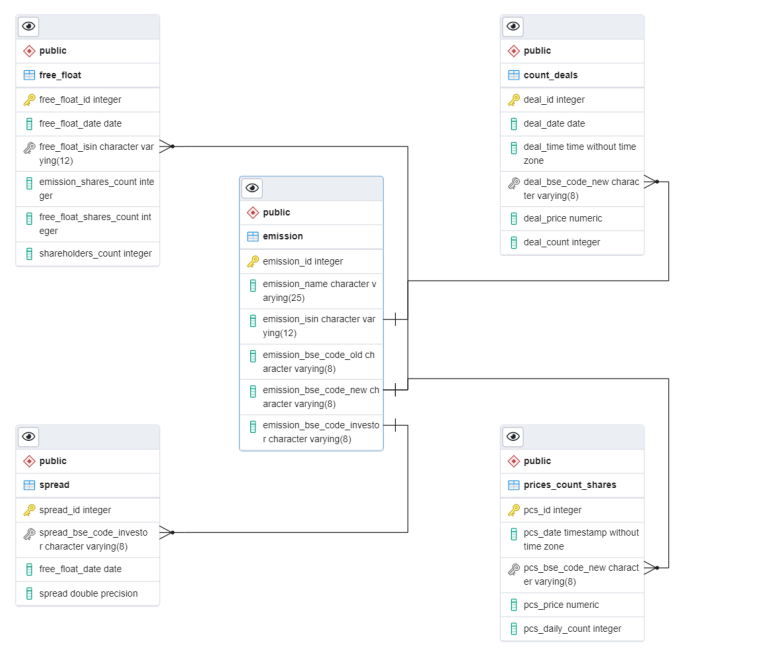

In [7]:
db_sofix_architecture = read_image('db_sofix/erd_diagram_sofix_db.pgerd.png')
plt.figure(figsize = (16,12))
plt.imshow(db_sofix_architecture)
plt.axis("off")
plt.show()

Структурата на таблиците следва архитектурата на входните данни от различните източници.

Архитектурата на изходните данни е изнесена в 4 views, които съответстват на четирите показателя. В тези обекти информацията е систематизирана с оглед по-голямо удобство за последващите обработки.  Sql-файловете на четирите views са предоставени в директория db_sofix на основната папка, а също могат да бъде разгледани и на https://pastebin.com/cgyW6wGR. 

Копие на базата данни може да се намери в: db_sofix/postgres_localhost-2021_08_06_20_43_12-dump.sql

## Модул за инициализиране на системата.

В този модул се прави началната инициализация на всеки шестмесечен период на наблюдение.

Файл: read_initial_data.py

In [ ]:
import pandas as pd
import psycopg2 as pg
from core import read_data_from_cd

"""
Файл: read_initial_data.py

Този модул чете първоначалните данни от Централен депозитар, БФБ и инвестор-бг
и определя емисиите, подлежащи на наблюдение в текущият период.
Критериите са:
1. Емисията да е допусната до търговия на основния пазар на Борсата.
2. Да има повече от 750 акционери.

Модула се изпълнява два пъти годишно, на 2 март и 2 септември с данни от съответният предходен ден.

Модула обработва 3 файла находящи се в директория data\initial_data:

    FREE_FLOAT.pdf; Източник на данни: Централен Депозитар, http://www.csd-bg.bg/index.php?menu=statistika_emitent
    Base_Market_Emission.csv; Източник на данни: Българска фондова борса, https://bse-sofia.bg/bg/market-segmentation
    mapping_bse_codies.xlsx; Източник на данни: Българска фондова борса, https://bse-sofia.bg/bg/market-segmentation

Обединява необходимата информация и я записва в таблица emission на sofix_db.

"""
# TODO clean table if there new period - better do this with all DB before new period


PATH_CD_START_POINT_DATA = 'data/initial_data/FREE_FLOAT.pdf'
PATH_BASE_MARKET_EMISSION_DATA = 'data/initial_data/Base_Market_Emission.csv'
PATH_BSE_CODE_INVESTOR = 'data/initial_data/mapping_bse_codies.xlsx'


def send_data_to_emission_table(participants):
    connection = pg.connect ( "host='127.0.0.1' port='5432' dbname='sofix_db' user='postgres' password='1234'" )
    cur = connection.cursor ()
    df = participants  # pd.read_csv('input_file.csv',parse_dates=['timestamp'],index_col=0)
    ids = cur.execute ( 'select emission_id from "emission"' )
    id = cur.rowcount+1
    for index, row in df.iterrows ():
        emission_id = str ( id )
        emission_name = str ( row[1] )
        emission_isin = str ( index )
        emission_bse_code_old = str ( row[6] )
        emission_bse_code_new = str ( row[0] )
        emission_bse_code_investor = str ( row[5] )
        insertdata = "('" + emission_id + "','" + emission_name + "', '" + emission_isin + "','" + emission_bse_code_old + "','" + emission_bse_code_new + "','" + emission_bse_code_investor + "')"
        id += 1
        print ( "insertdata :", insertdata )
        try:
            cur.execute ( "INSERT INTO emission values " + insertdata )
            print ( "row inserted:", insertdata )
        except pg.IntegrityError:
            print ( "Row already exist " )
            pass
        except Exception as e:
            print ( "some insert error:", e, "ins: ", insertdata )
        connection.commit ()


def read_data_from_bse(path):
    base_market_emission_data = pd.read_csv ( path, sep=';' )
    base_market_emission_data = base_market_emission_data[
        (base_market_emission_data['ПАЗАРЕН СЕГМЕНТ'] == ('Сегмент акции Standard')) | (
                    base_market_emission_data['ПАЗАРЕН СЕГМЕНТ'] == ('Сегмент акции Premium')) | (
                    base_market_emission_data['ПАЗАРЕН СЕГМЕНТ'] == (
                'Сегмент за дружества със специална инвестиционна цел'))]
    emission_data = base_market_emission_data.filter ( ['КОД', 'ИМЕ', 'ISIN', 'БРОЙ ЦЕННИ КНИЖА'], axis=1 )
    emission_data = emission_data.reset_index ()
    bse_data = emission_data.set_index ( 'ISIN' )
    return bse_data


def add_bse_code_investor(participants, path):
    mapping_codes_table = pd.read_excel ( path, sheet_name='Sheet1' )
    mapping_codes_table = mapping_codes_table.reset_index ()
    mapping_codes_table = mapping_codes_table.set_index ( 'isin' )
    mapping_codes_table = mapping_codes_table.filter ( ['bse_code_investor', 'bse_code_old'], axis=1 )
    end_result = pd.merge ( participants, mapping_codes_table, how="left", on='isin', validate="one_to_one" )
    return end_result


def generate_participants(bse_data, cd_data, path):
    participants = pd.concat ( [bse_data, cd_data], axis=1, join="inner" )
    participants = participants.loc[:, ~participants.columns.duplicated ( keep='first' )]
    participants = participants.filter ( ['КОД', 'ИМЕ', 'total_count', 'free_float', 'shareholders_count'], axis=1 )
    participants.columns = ['bse_code', 'name', 'total_count', 'free_float', 'shareholders_count']
    participants.index.name = 'isin'
    participants = add_bse_code_investor ( participants, path )
    return participants


cd_data = read_data_from_cd ( PATH_CD_START_POINT_DATA, shareholders_restriction_count = True )
bse_data = read_data_from_bse ( PATH_BASE_MARKET_EMISSION_DATA )
participants = generate_participants ( bse_data, cd_data, PATH_BSE_CODE_INVESTOR )
send_data_to_emission_table ( participants )

## Модул за извличане, обработка и записване на информацията

В този модул се извлича информация от четирите основни източника на информация.

Файлове:
- read_bse_bulletin.py
- read_deals_infostock.py
- read_free_float.py
- read_spread.py

Кратко описание на функционалността на модула може да се намери като коментар към всеки един от файловете в модула.

In [ ]:
import numpy as np
import pandas as pd
import psycopg2 as pg
import datetime
import os
import glob
from core import get_date_from_filename, get_registered_emission_from_db, get_current_week

"""
Файл: read_bse_bulletin.py

Този файл чете данни за цените и изтъргуваните обеми на наблюдаваните компании.
Файла се изпълнява ежедневно по данни от предходния ден. 
Предоставена е възможност и за пакетна обработка на повече от един файлове.

Кода обработва файловете находящи се в data\daily_data:
    Bltexddmmyyy.xls; Източник на данни: БФБ - официален бюлетин

Взема информация за дневната търговия на наблюдаваните емисии и ги записва в таблица prices_count_shares на sofix_db.
"""

current_path = os.getcwd ()+'\\data\\daily_data\\'
paths = glob.glob ( os.path.join ( current_path, "*.xls" ) )

def send_data_to_prices_count_shares_table(df_bse_bulletin_data):
    connection = pg.connect ( "host='127.0.0.1' port='5432' dbname='sofix_db' user='postgres' password='1234'" )
    cur = connection.cursor ()
    df = df_bse_bulletin_data
    #TODO Това няма да работи за по стари файлове - избира само последната обработена дата - да се оправи
    sql_str = "select pcs_date from prices_count_shares order by pcs_date desc limit 1"
    cur.execute(sql_str)
    try:
        last_date = cur.fetchone()[0]
        if datetime.datetime.strptime(str(last_date), '%Y-%m-%d') == datetime.datetime.strptime(get_date_from_filename(path, format_data_type = 'yyyymmdd'), '%Y-%m-%d'):
            print(f'The file has already been processed')
            return
    except:
        pass

    cur.execute ( "select pcs_id from prices_count_shares" )
    id = cur.rowcount+1

    for index, row in df.iterrows ():
        pcs_id = str(id)
        pcs_date = str(row[4])
        pcs_bse_code_new = str ( row[0] )
        pcs_product_price = str(round(float(row[2]), 4))
        pcs_price = str(round(float(row[3]),4))
        pcs_daily_count = str(int(row[1]))
        pcs_week = str(int(row[5]))
        insertdata = "('" + pcs_id + "','" + pcs_date + "', '" + pcs_bse_code_new + "', '" + pcs_price + "','" + pcs_daily_count + "','" + pcs_week + "','" + pcs_product_price + "')"

        print ( "insertdata :", insertdata )
        try:
            cur.execute ( "INSERT INTO prices_count_shares values " + insertdata )
            id += 1
            print ( "row inserted:", insertdata )
        except pg.IntegrityError:
            print ( "Row already exist " )
            pass
        except Exception as e:
            print ( "some insert error:", e, "ins: ", insertdata )
        connection.commit ()


def merge_data(df_bse_bulletin_data, registered_emission):
    registered_emission = pd.DataFrame(registered_emission, columns=["emission_bse_code_new"])
    registered_emission = registered_emission.set_index('emission_bse_code_new')
    merged_data = pd.merge ( registered_emission, df_bse_bulletin_data, how="left", on='emission_bse_code_new', validate="one_to_one" )
    return merged_data


def read_bse_bulletin(path):
    current_date=get_date_from_filename(path, format_data_type = 'ddmmyyyy')
    df_bse_data = pd.read_excel(path, sheet_name='Пазари акции и др. недългови ЦК')
    df_bse_data =  df_bse_data.iloc[18:]
    df_bse_data = df_bse_data[['Unnamed: 0', 'Unnamed: 7', 'Unnamed: 12', 'Unnamed: 13']]
    df_bse_data.columns=['emission_bse_code_new', 'daily_count', 'product_price', 'price']
    df_bse_data['daily_count'] = df_bse_data['daily_count'].replace(np.nan, 0)
    df_bse_data['current_date'] = current_date
    df_bse_data['current_week'] = get_current_week(path, format_data_type = 'ddmmyyyy')
    return df_bse_data

for path in paths:
    df_bse_bulletin_data = read_bse_bulletin ( path )
    df_bse_bulletin_data = merge_data(df_bse_bulletin_data, get_registered_emission_from_db('emission_bse_code_new'))
    send_data_to_prices_count_shares_table(df_bse_bulletin_data)

In [ ]:
import pandas as pd
import psycopg2 as pg
import datetime
from core import get_date_from_filename
import os
import glob
"""
Файл: read_deals_infostock.py

Този файл чете данни за сключените на БФБ сделки.
Файла се изпълнява ежедневно по данни от предходния ден.
Предоставена е възможност и за пакетна обработка на повече от един файлове.

Кода обработва файловете находящи се в data\daily_data:

    DealsInfostock-ddmmyyyy.xlsx; Източник на данни: infostock.bg, https://www.infostock.bg/infostock/control/transactions

Взема информация за всички сключени сделки с наблюдаваните емисии и я записва в таблица count_deals на sofix_db.
"""
# TODO clean table if there new period - better do this with all DB before new period df

current_path = os.getcwd ()+'\\data\\daily_data\\'
paths = glob.glob ( os.path.join ( current_path, "*.xlsx" ) )

def send_data_to_count_deals_table(df_deals, path):
    connection = pg.connect ( "host='127.0.0.1' port='5432' dbname='sofix_db' user='postgres' password='1234'" )
    cur = connection.cursor ()
    df = df_deals
    #TODO Това няма да работи за по стари файлове - избира само последната обработена дата - да се оправи
    cur.execute("select deal_date from count_deals order by deal_id desc limit 1")
    try:
        last_date = cur.fetchone()[0]
        if datetime.datetime.strptime(str(last_date), '%Y-%m-%d') == datetime.datetime.strptime(get_date_from_filename(path, format_data_type='ddmmyyyy'), '%Y-%m-%d'):
            print(f'The file has already been processed')
            return
    except:
        pass

    cur.execute ( "select deal_id from count_deals" )
    id = cur.rowcount+1

    for index, row in df.iterrows ():
        deal_id = str(id)
        deal_date = str(row[4])
        deal_time = str ( row[0] )
        deal_price = str ( row[1] )
        deal_bse_code_new = str(row[3])
        deal_count = str ( row[2] )
        insertdata = "('" + deal_id + "','" + deal_date + "', '" + deal_time + "', '" + deal_bse_code_new + "','" + deal_price + "','" + deal_count + "')"

        print ( "insertdata :", insertdata )
        try:
            cur.execute ( "INSERT INTO count_deals values " + insertdata )
            id += 1
            print ( "row inserted:", insertdata )
        except pg.IntegrityError:
            print ( "Row already exist " )
            pass
        except Exception as e:
            print ( "some insert error:", e, "ins: ", insertdata )
        connection.commit ()


def read_deals_infostock(path):
    current_date=get_date_from_filename(path, format_data_type = 'ddmmyyyy')
    df_deals = pd.read_excel(path, sheet_name='Sheet1')
    df_bse_code = df_deals['Код'].str.split(pat=" / ", expand=True)[0]
    df_deals = df_deals.filter(['Час', 'Цена', 'Брой'], axis=1)
    df_deals.index.name = 'index'
    df_bse_code.index.name = 'index'
    df_bse_code.name = 'bse_code'
    df_deals_result = pd.merge ( df_deals, df_bse_code, how="left", on='index', validate="one_to_one" )
    df_deals_result['current_date'] = current_date
    return df_deals_result

for path in paths:
    df_deals_data = read_deals_infostock ( path )
    send_data_to_count_deals_table ( df_deals_data, path )

In [ ]:
import pandas as pd
import psycopg2 as pg
import datetime
import os
import glob
from core import get_registered_emission_from_db, get_date_from_filename, read_data_from_cd

"""
Файл: read_free_float.py

Този файл чете данни за фрий флоута на компаниите регистрирани в Централен депозитар.
Файла се изпълнява ежедневно по данни от предходния ден.
Предоставена е възможност и за пакетна обработка на повече от един файлове.

Кода обработва файловете находящи се в data\daily_data:

    FREE_FLOAT_-yyyymmdd.pdf; Източник на данни: Централен депозитар, http://www.csd-bg.bg/index.php?menu=statistika_emitent

Взема информация за всички регистрирани в ЦД емисии, отсява данни само наблюдаваните емисии и ги записва в таблица free_float на sofix_db.
"""

current_path = os.getcwd ()+'\\data\\daily_data\\'
paths = glob.glob ( os.path.join ( current_path, "*.pdf" ) )

def merge_data(cd_data, registered_emission):
    registered_emission = pd.DataFrame(registered_emission, columns=["isin"])
    registered_emission = registered_emission.set_index('isin')
    freefloat_data = pd.merge ( registered_emission, cd_data, how="left", on='isin', validate="one_to_one" )
    return freefloat_data

def send_data_to_freefloat_table(freefloat_data):
    connection = pg.connect ( "host='127.0.0.1' port='5432' dbname='sofix_db' user='postgres' password='1234'" )
    cur = connection.cursor ()
    df = freefloat_data
    #TODO Това няма да работи за по стари файлове - избира само последната обработена дата - да се оправи
    sql_str = "select free_float_date from free_float order by free_float_date desc limit 1"
    cur.execute(sql_str)
    try:
        last_date = cur.fetchone()[0]
        if datetime.datetime.strptime(str(last_date), '%Y-%m-%d') == datetime.datetime.strptime(get_date_from_filename(path, format_data_type = 'yyyymmdd'), '%Y-%m-%d'):
            print(f'The file has already been processed')
            return
    except:
        pass

    cur.execute ( "select free_float_id from free_float" )
    id = cur.rowcount+1

    for index, row in df.iterrows ():
        free_float_id = str(id)
        free_float_date = str(row[5])
        free_float_isin = str ( index )
        emission_shares_count = str(int(row[2]))
        free_float_shares_count = str(int(row[3]))
        shareholders_count = str ( int(row[4] ))
        insertdata = "('" + free_float_id + "','" + free_float_date + "', '" + free_float_isin + "', '" + emission_shares_count + "','" + free_float_shares_count + "','" + shareholders_count + "')"

        print ( "insertdata :", insertdata )
        try:
            cur.execute ( "INSERT INTO free_float values " + insertdata )
            id += 1
            print ( "row inserted:", insertdata )
        except pg.IntegrityError:
            print ( "Row already exist " )
            pass
        except Exception as e:
            print ( "some insert error:", e, "ins: ", insertdata )
        connection.commit ()

for path in paths:
    cd_data = read_data_from_cd ( path, shareholders_restriction_count = False )
    free_float_data = merge_data(cd_data, get_registered_emission_from_db('emission_isin'))
    send_data_to_freefloat_table(free_float_data)

In [ ]:
import datetime
import pandas as pd
import psycopg2 as pg
from core import get_registered_emission_from_db

"""
Файл: read_spread.py
Този файл чете данни за текущите котировки при наблюдаваните компании и изчислява спреда между тях.
Файла се изпълнява веднъж дневно в периода 10:30:00 до 17:00:00 часа.

Кода тегли данни от сайта на Инвестор.бг:
    https://www.investor.bg/companies/{code}/view/

След като се изчисли, спреда се записва в таблица spread на sofix_db.
"""

def send_spread_to_spread_table(spread_data):
    connection = pg.connect ( "host='127.0.0.1' port='5432' dbname='sofix_db' user='postgres' password='1234'" )
    cur = connection.cursor ()
    df = spread_data
    # TODO Това няма да работи за по стари файлове - избира само последната обработена дата - да се оправи
    # TODO По-удачно да се прави проверката дали е обработена датата преди да се четат данните.
    sql_str = "select spread_date from spread order by spread_date desc limit 1"
    cur.execute(sql_str)
    try:
        last_date = cur.fetchone()[0]
        if datetime.datetime.strptime(str(last_date), '%Y-%m-%d') == datetime.datetime.strptime(str(datetime.date.today ()), '%Y-%m-%d'):
            print(f'The file has already been processed')
            return
    except:
        pass

    cur.execute ( "select spread_id from spread" )
    id = cur.rowcount+1

    for index, row in df.iterrows ():
        spread_id = str(id)
        spread_date = str(row[1])
        spread_bse_code_ninvestor = str ( row[0] )
        spread = str(round(float(row[2]),6))
        insertdata = "('" + spread_id + "','" + spread_bse_code_ninvestor + "', '" + spread_date + "', '" + spread + "')"

        print ( "insertdata :", insertdata )
        try:
            cur.execute ( "INSERT INTO spread values " + insertdata )
            id += 1
            print ( "row inserted:", insertdata )
        except pg.IntegrityError:
            print ( "Row already exist " )
            pass
        except Exception as e:
            print ( "some insert error:", e, "ins: ", insertdata )
        connection.commit ()

def calculate_spread(offers_buy,offers_sell):
    buy_price = 0.00
    sell_price = 0.00
    buy_sum = 0
    sell_sum = 0

    for i in range (0,len(offers_buy)):
        buy_sum += int(offers_buy.iat[i, 0])*float(offers_buy.iat[i, 1])/1000
        if buy_sum >=20000:
            buy_price = float(offers_buy.iat[i, 1])/1000
            break

    for i in range (0,len(offers_sell)):
        sell_sum += int(offers_sell.iat[i, 0]) * float(offers_sell.iat[i, 1] )/ 1000
        if sell_sum >=20000:
            sell_price = float(offers_sell.iat[i, 1])/1000
            break

    if sell_price ==0 or buy_price == 0:
        spread = 0.00
    else:
        spread = (sell_price-buy_price)/sell_price

    return spread


def get_data_from_web(codies):
    today = datetime.date.today ()
    spread_data = pd.DataFrame ( [] )
    for code in codies:
        html_str = f"https://www.investor.bg/companies/{code}/view/"
        offers_buy = pd.read_html ( html_str, encoding="utf-8" )[3][:-1]
        offers_sell = pd.read_html ( html_str, encoding="utf-8" )[4][:-1]
        spread = calculate_spread ( offers_buy, offers_sell )
        row = {'spread_bse_code_investor': code, 'spread_date': today, 'spread': spread}
        spread_data = spread_data.append ( row, ignore_index=True )

    return spread_data


registered_emission = get_registered_emission_from_db('emission_bse_code_investor')
codies = [registered_emission[i][0] for i in range(0, len(registered_emission))]
spread_data = get_data_from_web(codies)
send_spread_to_spread_table(spread_data)

## Модул за генериране на текуща класация.

Този модул се извлича съхранената в базата данни информация, обработва я и генерира текущата класация.

Файл: indicators.py

В четири отделни функции се извлича/групира/сортира информацията за четирите различни показатели, резултатите се ранкират  и връщат на основната логика. Накрая се извиква report_competition(), която генерира класацията. Резултата се записва в изходен файл data/competition.csv

In [ ]:
import pandas as pd
import psycopg2 as pg
from core import get_registered_emission_from_db


def count_deals_indicator():
    connection = pg.connect ( "host='127.0.0.1' port='5432' dbname='sofix_db' user='postgres' password='1234'" )
    cur = connection.cursor ()
    cur.execute ( "select * from count_deals_view order by count desc" )
    count_deals = pd.DataFrame(cur.fetchall())
    cur.close()
    connection.close()
    return count_deals

def count_spread_factor(df, code, count_dates):
    df_codes = df[df[0]==code]
    if len(df_codes)/len(count_dates)< 0.6827: #0.6827   2/3
        return False
    return True

def spread():
    connection = pg.connect ( "host='127.0.0.1' port='5432' dbname='sofix_db' user='postgres' password='1234'" )
    cur = connection.cursor ()
    cur.execute ( "select * from spread_view" )
    spread = pd.DataFrame(cur.fetchall())
    count_dates = spread[1].unique()
    spread_index = spread[(spread[2]==0.0)].index
    spread.drop ( spread_index, inplace=True )

    for code in  spread[0].unique():
        count_factor = count_spread_factor(spread, code, count_dates)
        if not count_factor:
            spread.drop(spread[spread[0] == code].index, inplace=True)

    spread = spread.groupby ( by=[0] ).mean ().sort_values ( by=[2] )
    cur.close()
    connection.close()
    return spread

def get_free_float_coef(df):
    coef = pd.DataFrame(df.groupby ( ['bse_code_new'] )['free_float_coef'].median ().sort_values (ascending=False))
    coef.columns = ['free_float_coef_median'] 
    coef.index.name = 'bse_code_new'
    return coef

def get_free_float_mc_last_date(df):
    df_id = df[(df['date'] != df.date.max ())].index
    if not df_id.empty:
        df.drop ( df_id, inplace=True )
    return df

def free_float_market_capitalization():
    connection = pg.connect ( "host='127.0.0.1' port='5432' dbname='sofix_db' user='postgres' password='1234'" )
    cur = connection.cursor ()
    cur.execute ( "select * from free_float_mc_view" )
    free_float_mc = pd.DataFrame(cur.fetchall())
    free_float_mc.columns = ['bse_code_new', 'date', 'price', 'free_float_shares_count', 'emission_shares_count']
    free_float_mc ['free_float_coef'] =(free_float_mc['free_float_shares_count'] / free_float_mc['emission_shares_count'])#*(free_float_mc['price'].apply ( lambda x: float ( x ) )))

    free_float_coef = get_free_float_coef(free_float_mc) # изчисляваме free_float_coef
    free_float_mc_last_date = get_free_float_mc_last_date(free_float_mc) # вземаме последната дата и цената на емисията за нея

    free_float_mc = pd.merge ( free_float_mc_last_date, free_float_coef, how="left", on='bse_code_new', validate="one_to_one" )
    free_float_mc['market_capitalization'] = free_float_mc['emission_shares_count']*free_float_mc['free_float_coef_median']*(free_float_mc['price'].apply ( lambda x: float ( x ) ))
    free_float_mc = free_float_mc.filter(['bse_code_new', 'market_capitalization'], axis=1).sort_values(by=['market_capitalization'],ascending=False )
    df_id = free_float_mc[(free_float_mc['market_capitalization'] < 10000000)].index
    free_float_mc.drop ( df_id, inplace=True )
    free_float_mc.reset_index(drop=True, inplace=True)
    cur.close()
    connection.close()
    return free_float_mc

def weekly_volume():
    connection = pg.connect ( "host='127.0.0.1' port='5432' dbname='sofix_db' user='postgres' password='1234'" )
    cur = connection.cursor ()
    cur.execute ( "select pcs_bse_code_new, sum(weekly_volume), pcs_week from weekly_volume_view group by pcs_bse_code_new, pcs_week order by pcs_bse_code_new" )
    weekly_volume = pd.DataFrame(cur.fetchall())
    weekly_volume_result = pd.DataFrame(weekly_volume.groupby([0])[1].median().sort_values(ascending=False))
    cur.close()
    connection.close()
    return weekly_volume_result

def report_competition(count_deals,spread,free_float_market_capitalization,weekly_volume ):
    count_deals['rank']=count_deals[1].rank( method='min', ascending=False)*0.25
    spread['rank'] = spread[2].rank(method='min')*0.25
    free_float_market_capitalization['rank'] = free_float_market_capitalization['market_capitalization'].rank(method='min', ascending=False)*0.25
    weekly_volume['rank'] = weekly_volume[1].rank(method='min', ascending=False)*0.25

    registered_emission = pd.DataFrame(get_registered_emission_from_db('emission_bse_code_new'))
    registered_emission.columns = ['emission_bse_code_new']
    count_deals.columns = ['emission_bse_code_new', 'count_deals','rank']
    spread.columns = ['spread','rank']
    spread.index.name = 'emission_bse_code_new'
    free_float_market_capitalization.columns = ['emission_bse_code_new', 'market_capitalization','rank']
    weekly_volume = weekly_volume.reset_index()
    weekly_volume.columns = ['emission_bse_code_new','weekly_volume','rank']

    registered_emission = registered_emission.merge(count_deals, on="emission_bse_code_new", how="left")
    registered_emission = registered_emission.merge(spread, on="emission_bse_code_new", how="left")
    registered_emission = registered_emission.merge(free_float_market_capitalization,on="emission_bse_code_new", how="left",)
    registered_emission = registered_emission.merge(weekly_volume, on="emission_bse_code_new", how="left")
    registered_emission.columns = ['emission_bse_code_new', 'count_deals', 'rank_deals','spread','rank_spread','market_cap','rank_cap','weekly_volume', 'rank_vol']
    registered_emission['rank'] = registered_emission['rank_deals']+registered_emission['rank_spread']+registered_emission['rank_cap']+registered_emission['rank_vol']
    df_competition = registered_emission.sort_values(by=['rank'],ascending=True)
    df_competition = df_competition.reset_index(drop=True)
    df_competition = df_competition[['rank','emission_bse_code_new', 'count_deals', 'spread', 'market_cap']]

    return df_competition


count_deals = count_deals_indicator()
spread = spread()
free_float_market_capitalization = free_float_market_capitalization()
weekly_volume = weekly_volume()
report_competition = report_competition(count_deals,spread,free_float_market_capitalization,weekly_volume )
report_competition.to_csv('data/competition.csv')

print((report_competition))

## Спомагателни функции

В файл core.py е изнесена логика, която се преизползва от всички модули в проекта.

In [ ]:
import re
from datetime import datetime
import pandas as pd
import psycopg2 as pg
from tabula import read_pdf


def get_registered_emission_from_db(ind_col):
    connection = pg.connect ( "host='127.0.0.1' port='5432' dbname='sofix_db' user='postgres' password='1234'" )
    cur = connection.cursor ()
    sql_str = f"select {ind_col} from emission"
    cur.execute ( sql_str )
    registered_emission = cur.fetchall()
    cur.close()
    connection.close()
    return registered_emission

def get_date_from_filename(path, format_data_type):
    file_name = path.split('/')[-1]
    number = re.search(r'\d+', file_name).group(0)
    if format_data_type =='yyyymmdd': # FREE_FLOAT_-yyyymmdd.pdf
        day, month, year = number[-2:], number[4:6], number[0:4]
    else:
        day, month, year = number[0:2], number[2:4], number[-4:] #  DealsInfostock-ddmmyyyy.xlsx
    return f'{year}-{month}-{day}'

def get_current_week(path, format_data_type):
    current_date = get_date_from_filename(path, format_data_type)
    current_date=datetime.strptime(current_date,  '%Y-%m-%d')
    week_number =current_date.strftime ( "%U" )
    return week_number

def read_data_from_cd(path, shareholders_restriction_count):
    cd_data = read_pdf ( path, pages="all", area=(10, 0, 100, 110), stream=True, relative_area=True )
    for i in range ( 0, len ( cd_data ) ):
        cd_data[i].columns = ['name', 'isin', 'total_count', 'free_float', 'shareholders_count']
    cd_data_df = pd.concat ( [el for el in cd_data], ignore_index=True, axis=0 )
    cd_data_df = cd_data_df.dropna ()
    if shareholders_restriction_count:
        cd_data_df = cd_data_df[cd_data_df.shareholders_count >= 750]
    cd_data_df = cd_data_df.reset_index ()
    cd_data = cd_data_df.set_index ( 'isin' )
    if not shareholders_restriction_count:
        current_date = get_date_from_filename(path, format_data_type = 'yyyymmdd')
        cd_data['current_date'] = current_date
    return cd_data


## Етапи на внедряване на модела

## Описание на настоящия модел за прогноза на индекса
Проблеми, отклонения, резултати от предходни периоди,мотивация за подобрение на модела и за миграция към Пайтън

## Анализ на отклоненията на модела от алгоритъма

- отклонения свързани с липсата на пълната информация - неизбежни 
- отклонения свързани с несъвършенствата на алгоритъма - 60/40
- отклонения свързани с човешки грешки

##  Заключение

##  References